# Exploration data analysis (EDA)

In [1]:
# Load data
import json
with open('../data/raw/Jan2020Frontiers.jsonl', 'r') as json_file:
    json_list = list(json_file)

list_of_papers = []
    
for json_str in json_list:
    result = json.loads(json_str)
    list_of_papers.append(result)

In [2]:
import pandas as pd
df = pd.DataFrame.from_dict(list_of_papers)

In [3]:
df.sort_values(by="journal", ascending=False)

,id,text,journal
379,493646,\n Longitudinal Characterization of Coccidiosi...,Frontiers in Veterinary Science
138,492485,\n Use of Slow-Release Injectable Moxidectin f...,Frontiers in Veterinary Science
2500,509440,\n Evaluation of Yeast Fermented Poultry By-Pr...,Frontiers in Veterinary Science
474,511274,"\n In-vivo Intramuscular Collagen Synthesis, ...",Frontiers in Veterinary Science
2405,501066,\n Risk Factors of Anesthesia-Related Mortalit...,Frontiers in Veterinary Science
...,...,...,...
1266,495739,\n \n Meet Neo: Your Distant Cousin? \n \n \n ...,Frontiers for Young Minds
254,469380,\n \n \n What Are Model Microorganisms? \n \n ...,Frontiers for Young Minds
1792,461075,\n \n Computing the Climate: Building a Model ...,Frontiers for Young Minds
1782,492340,\n \n \n Why Vaccines Do Not Work Without Trus...,Frontiers for Young Minds


In [4]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/operti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/operti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import re
org_string = "Sample 11 String 42 -In 2020"
pattern = r'[0-9]'
# Match all digits in the string and replace them by empty string
mod_string = re.sub(pattern, '', org_string)
mod_string

'Sample  String  -In '

In [7]:
import re
def find_keywords(s):
    start = "Keywords:"
    end = "Citation:"
    s = s.replace(" :",":")
    keywords_list = s[s.find(start)+len(start):s.rfind(end)].replace("\n"," ").replace(":","").split(",")
    keywords_list = [keyword.strip() for keyword in keywords_list ]
    return keywords_list

In [8]:
list_of_all_keywords = []
for i, row in df.iterrows():
    list_of_all_keywords.append(find_keywords(row["text"]))
df["keywords"] = list_of_all_keywords
df["keywords_len"] = df["keywords"].apply(lambda x: len(x))

In [12]:
def preprocess(text):
    text = re.sub(r'[0-9]', '', text)
    word_to_remove = ["google", "scholar"]
    stop = set(stopwords.words('english') + list(string.punctuation))
    preprocessed_text = " ".join([i for i in word_tokenize(text.lower()) if (i not in stop) and (len(i) > 3) and (i not in word_to_remove)])
    return preprocessed_text

In [ ]:
df["preprocessed_text"] = df["text"].apply(preprocess)

In [15]:
df.shape

(2528, 6)

In [16]:
df.head(5)

,id,text,journal,preprocessed_text,keywords,keywords_len
0,465950,\n Sleep Characteristics and Influencing Facto...,Frontiers in Medicine,sleep characteristics influencing factors slee...,"[inflammatory bowel disease, arthritis, sleep ...",5
1,483526,A Hybrid Approach for Modeling Type 2 Diabetes...,Frontiers in Genetics,hybrid approach modeling type diabetes mellitu...,"[type 2 diabetes mellitus, machine learning, h...",6
2,482500,\n Relationship Between SES and Academic Achie...,Frontiers in Psychology,relationship academic achievement junior high ...,"[socioeconomic status, self-concept, school ac...",5
3,437333,Environmental Health Research in Africa: Impor...,Frontiers in Genetics,environmental health research africa important...,"[G x E, Africa, environmental, pesticides, met...",7
4,486515,"\n 3,5-T2—A Janus-Faced Thyroid Hormone Metabo...",Frontiers in Endocrinology,"3,5-t2—a janus-faced thyroid hormone metabolit...","[thyroid hormone, 3, 5-diiodothyronine, hypoth...",9


In [17]:
df.sort_values(by="keywords_len", ascending=False)

,id,text,journal,preprocessed_text,keywords,keywords_len
1116,486107,\n \n \n Do Not Swat the Wasp! \n \n \n \n \n ...,Frontiers for Young Minds,swat wasp abstract probably like bees cute fur...,[Not Swat the Wasp! Abstract You p...,189
1044,480838,"\n \n \n Drought, Floods, Climate Change, and ...",Frontiers for Young Minds,drought floods climate change forest loss amaz...,"[ought, Floods, Climate Change, and Forest Los...",188
1482,490548,\n \n From Ouch to Ah-ha! Understanding Wounds...,Frontiers for Young Minds,ouch ah-ha understanding wounds healing infect...,"[Ouch to Ah-ha! Understanding Wounds, Healing,...",181
1123,485296,\n \n \n Blood Vessels Under the Microscope \n...,Frontiers for Young Minds,blood vessels microscope abstract paper looks ...,[ood Vessels Under the Microscope Ab...,179
1266,495739,\n \n Meet Neo: Your Distant Cousin? \n \n \n ...,Frontiers for Young Minds,meet distant cousin abstract ever wondered ext...,[Neo Your Distant Cousin? Abstract ...,159
...,...,...,...,...,...,...
1081,486292,"\n Metabolic Syndrome, and Particularly the Hy...",Frontiers in Endocrinology,metabolic syndrome particularly hypertriglycer...,"[breast cancer, metabolic syndrome, hypertrigl...",5
1080,496512,\n Prognosis and Risk Factors of Radiation-Ind...,Frontiers in Oncology,prognosis risk factors radiation-induced lymph...,"[radiation-induced lymphopenia, stereotactic b...",5
1079,503594,\n Saikosaponin A Inhibits Triple-Negative Bre...,Frontiers in Oncology,saikosaponin inhibits triple-negative breast c...,"[saikosaponin A, natural product, triple-negat...",5
1078,478403,\n Brain Gray Matter Volume Associations With ...,Frontiers in Aging Neuroscience,brain gray matter volume associations abnormal...,"[MRI, aged, brain, motricity, EPI-epidemiology]",5


<AxesSubplot:>

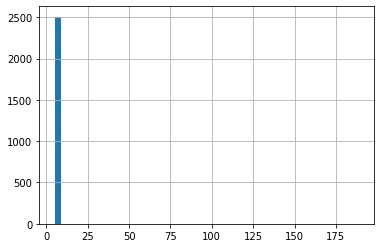

In [18]:
df["keywords_len"].hist(bins=50)

In [19]:
import matplotlib.pyplot as plt
df[df["keywords_len"] >8].shape

(21, 6)

In [20]:
df_remove_keywords_unknown = df[df["keywords_len"] <=8]

In [21]:
df_remove_keywords_unknown.head()

,id,text,journal,preprocessed_text,keywords,keywords_len
0,465950,\n Sleep Characteristics and Influencing Facto...,Frontiers in Medicine,sleep characteristics influencing factors slee...,"[inflammatory bowel disease, arthritis, sleep ...",5
1,483526,A Hybrid Approach for Modeling Type 2 Diabetes...,Frontiers in Genetics,hybrid approach modeling type diabetes mellitu...,"[type 2 diabetes mellitus, machine learning, h...",6
2,482500,\n Relationship Between SES and Academic Achie...,Frontiers in Psychology,relationship academic achievement junior high ...,"[socioeconomic status, self-concept, school ac...",5
3,437333,Environmental Health Research in Africa: Impor...,Frontiers in Genetics,environmental health research africa important...,"[G x E, Africa, environmental, pesticides, met...",7
5,463298,\n Managing Oil Palm Plantations More Sustaina...,Frontiers in Forests and Global Change,managing palm plantations sustainably large-sc...,"[biodiversity, habitat heterogeneity, palm oil...",8


<AxesSubplot:xlabel='journal'>

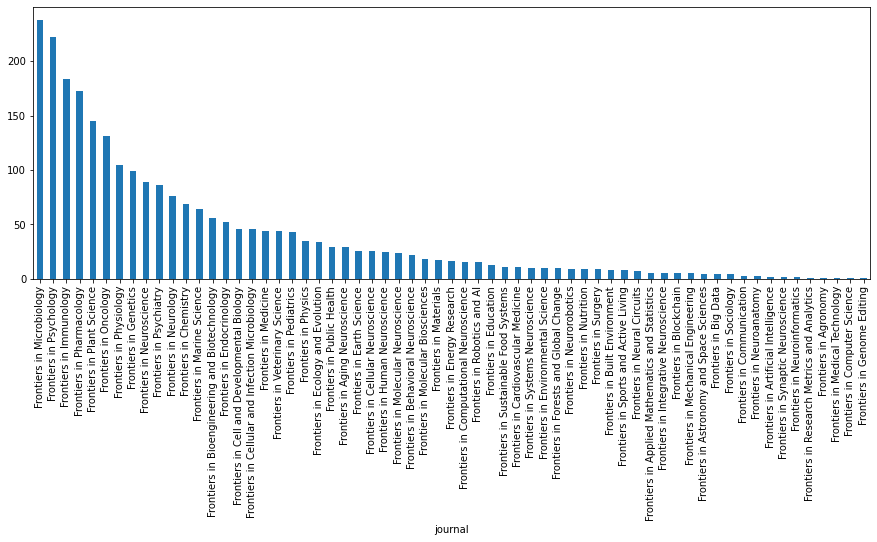

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,5]
df_remove_keywords_unknown.groupby(["journal"]).size().sort_values(ascending=False).plot.bar()


# TF IDF vectors

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_idf_vectors = vectorizer.fit_transform(df["preprocessed_text"].to_list())

In [44]:
tfidf_df = pd.DataFrame(tf_idf_vectors.toarray(), columns=vectorizer.get_feature_names())

/home/operti/miniconda3/envs/frontiers/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
tfidf_df.head(2)

,00,000,0000,00000,00000000,000000000,0000000000000001,0000000000000002,0000000000000005,0000000000000007,...,ﬂabellifolia,ﬂaps,ﬂavonoid,ﬂesh,ﬂoral,ﬂower,ﬂowering,ﬂuctuations,ﬂuorescence,ﬂuoxetine
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
tfidf_df.shape

(2528, 423594)

In [ ]:
tfidf_df["journal"] = df["journal"].to_list()

In [ ]:
tfidf_df.shape

In [32]:
mean_tf_idf = tfidf_df.groupby(["journal"]).mean()

In [40]:
len(tf_idf_vectors[0].toarray()[0])

423594

In [41]:
mean_tf_idf.shape

(64, 423593)

In [38]:
from sklearn.metrics.pairwise import cosine_similarity
index = 0
cosine_sim = cosine_similarity(tf_idf_vectors[index].toarray(), mean_tf_idf.values)
cosine_sim

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 423594 while Y.shape[1] == 423593

In [58]:
idx = (-cosine_sim[0][1:]).argsort()[:3]
idx

array([ 472,  935, 2299])

In [59]:
df["journal"][index], df["journal"][idx[0]], df["journal"][idx[1]], df["journal"][idx[2]] 

('Frontiers in Medicine',
 'Frontiers in Pharmacology',
 'Frontiers in Neuroscience',
 'Frontiers in Microbiology')

# Text Rank keyword extraction

In [219]:
from summa import keywords
index = 2
doc=df["preprocessed_text"][index]
TR_keywords = keywords.keywords(doc, scores=True)
TR_keywords[0:5]

[('studies', 0.25684631320461637),
 ('children', 0.25621096968508683),
 ('families', 0.24323162322036732),
 ('self', 0.20787269983019768),
 ('relationship academic achievement', 0.16313984022812955)]

In [220]:
df["journal"][index]

'Frontiers in Psychology'

# SPACY word2vec (keywords)
https://spacy.io/usage/linguistic-features/#vectors-similarity

In [19]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [20]:
df.head(2)

,id,text,journal,keywords,keywords_len,preprocessed_text
0,465950,\n Sleep Characteristics and Influencing Facto...,Frontiers in Medicine,"[inflammatory bowel disease, arthritis, sleep ...",5,sleep characteristics influencing factors slee...
1,483526,A Hybrid Approach for Modeling Type 2 Diabetes...,Frontiers in Genetics,"[type 2 diabetes mellitus, machine learning, h...",6,hybrid approach modeling type diabetes mellitu...


In [17]:
import numpy as np
np.array([[1,2],[1,4]]).mean(axis=0)

array([1., 3.])

In [149]:
def get_embeddings_keyword(list_of_keywords):
    vectors = []
    for key in list_of_keywords:
        key_doc = nlp(key)
        vectors.append(key_doc.vector)
    return np.array(vectors).mean(axis=0)

In [46]:
from pandarallel import pandarallel

pandarallel.initialize(nb_workers=7,progress_bar=True)

df["keywords_embeddings"] = df["keywords"].parallel_apply(get_embeddings_keyword)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [101]:
journal_embeddings = df.groupby(["journal"])["keywords_embeddings"].mean().to_frame().reset_index()
journal_embeddings

,journal,keywords_embeddings
0,Frontiers for Young Minds,"[-0.07116392, 0.15114562, -0.11049343, -0.0755..."
1,Frontiers in Aging Neuroscience,"[-0.048097316, 0.1325472, -0.0554827, -0.03627..."
2,Frontiers in Agronomy,"[-0.43071333, 0.27597216, 0.03861053, -0.38834..."
3,Frontiers in Applied Mathematics and Statistics,"[-0.25631008, 0.21899977, -0.047217213, 0.0342..."
4,Frontiers in Artificial Intelligence,"[-0.1045075, 0.19754782, 0.008936133, 0.026789..."
...,...,...
59,Frontiers in Surgery,"[-0.13345355, 0.1275831, -0.053415906, 0.15579..."
60,Frontiers in Sustainable Food Systems,"[-0.24585603, 0.19002391, -0.017854257, -0.119..."
61,Frontiers in Synaptic Neuroscience,"[0.18620527, 0.04562223, -0.18779495, -0.02507..."
62,Frontiers in Systems Neuroscience,"[0.07675902, 0.17128514, -0.13052903, 0.043196..."


In [102]:
df.head(2)

,id,text,journal,keywords,keywords_len,preprocessed_text,keywords_embeddings
0,465950,\n Sleep Characteristics and Influencing Facto...,Frontiers in Medicine,"[inflammatory bowel disease, arthritis, sleep ...",5,sleep characteristics influencing factors slee...,"[-0.19882119, 0.32291594, -0.27029547, -0.0390..."
1,483526,A Hybrid Approach for Modeling Type 2 Diabetes...,Frontiers in Genetics,"[type 2 diabetes mellitus, machine learning, h...",6,hybrid approach modeling type diabetes mellitu...,"[-0.17922127, 0.32079363, -0.09769386, 0.04941..."


In [146]:
from sklearn.metrics.pairwise import cosine_similarity
index = 14
cosine_sim = cosine_similarity(df["keywords_embeddings"][index].reshape(1,-1), np.stack(journal_embeddings["keywords_embeddings"].values))
cosine_sim

array([[0.50726074, 0.51568997, 0.5838501 , 0.557706  , 0.52329665,
        0.5100353 , 0.538583  , 0.6287531 , 0.59479153, 0.35973155,
        0.6436441 , 0.44694018, 0.47793683, 0.43849185, 0.53674054,
        0.59000784, 0.42205784, 0.55904466, 0.40350667, 0.7730214 ,
        0.7905419 , 0.50404793, 0.5031027 , 0.5991471 , 0.7571712 ,
        0.8507979 , 0.5893229 , 0.44723868, 0.56165195, 0.48336497,
        0.53922653, 0.78621066, 0.5424148 , 0.59364027, 0.4107512 ,
        0.54840195, 0.61265206, 0.55753666, 0.49499887, 0.4542924 ,
        0.38982505, 0.5239486 , 0.51916605, 0.5263492 , 0.56998134,
        0.56746614, 0.4774621 , 0.49184275, 0.52782094, 0.60036546,
        0.571319  , 0.69894564, 0.5244699 , 0.5461649 , 0.5807305 ,
        0.42773446, 0.524528  , 0.47397375, 0.51960313, 0.46375048,
        0.75303113, 0.41075805, 0.5034278 , 0.57995033]], dtype=float32)

In [147]:
idx = (-cosine_sim[0]).argsort()[:3]
idx

array([25, 20, 31])

In [148]:
df["journal"][index], journal_embeddings["journal"][idx[0]], journal_embeddings["journal"][idx[1]], journal_embeddings["journal"][idx[2]] 

('Frontiers in Ecology and Evolution',
 'Frontiers in Forests and Global Change',
 'Frontiers in Ecology and Evolution',
 'Frontiers in Marine Science')

In [194]:
# custom test
keywords_embeddings_test = get_embeddings_keyword([ "physics of cities", "census", "racial residential segregation", "gentrification", "city clustering algorithm"])
cosine_sim = cosine_similarity(keywords_embeddings_test.reshape(1,-1), np.stack(journal_embeddings["keywords_embeddings"].values))
idx = (-cosine_sim[0]).argsort()[:3]
journal_embeddings["journal"][idx[0]], journal_embeddings["journal"][idx[1]], journal_embeddings["journal"][idx[2]]

('Frontiers in Sociology',
 'Frontiers in Public Health',
 'Frontiers in Environmental Science')

# SPACY word2vec (whole document)

In [156]:
def get_document_embedding(text):
    doc = nlp(text)
    return doc.vector

In [159]:
pandarallel.initialize(nb_workers=7,progress_bar=True)

df["embeddings_preproceed_text"] = df["preprocessed_text"].parallel_apply(get_document_embedding)

INFO: Pandarallel will run on 7 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [160]:
journal_embeddings_whole_text = df.groupby(["journal"])["embeddings_preproceed_text"].mean().to_frame().reset_index()


In [161]:
df.head()

,id,text,journal,keywords,keywords_len,preprocessed_text,keywords_embeddings,embeddings_preproceed_text
0,465950,\n Sleep Characteristics and Influencing Facto...,Frontiers in Medicine,"[inflammatory bowel disease, arthritis, sleep ...",5,sleep characteristics influencing factors slee...,"[-0.19882119, 0.32291594, -0.27029547, -0.0390...","[-0.14144625, 0.19849797, -0.13403033, 0.05077..."
1,483526,A Hybrid Approach for Modeling Type 2 Diabetes...,Frontiers in Genetics,"[type 2 diabetes mellitus, machine learning, h...",6,hybrid approach modeling type diabetes mellitu...,"[-0.17922127, 0.32079363, -0.09769386, 0.04941...","[-0.1051252, 0.16541193, -0.067528166, 0.01435..."
2,482500,\n Relationship Between SES and Academic Achie...,Frontiers in Psychology,"[socioeconomic status, self-concept, school ac...",5,relationship academic achievement junior high ...,"[-0.13371883, 0.17204794, -0.029828792, -0.094...","[-0.096085764, 0.15218453, -0.0245518, 0.01957..."
3,437333,Environmental Health Research in Africa: Impor...,Frontiers in Genetics,"[G x E, Africa, environmental, pesticides, met...",7,environmental health research africa important...,"[-0.35752907, 0.31384423, -0.06836276, -0.0358...","[-0.09711438, 0.104003854, -0.022595188, 0.090..."
4,486515,"\n 3,5-T2—A Janus-Faced Thyroid Hormone Metabo...",Frontiers in Endocrinology,"[thyroid hormone, 3, 5-diiodothyronine, hypoth...",9,"3,5-t2—a janus-faced thyroid hormone metabolit...","[-0.17045988, 0.22827056, -0.1552076, 0.135012...","[-0.08338285, 0.16250584, -0.11525327, 0.10031..."


In [190]:
index = 7
cosine_sim = cosine_similarity(df["embeddings_preproceed_text"][index].reshape(1,-1), np.stack(journal_embeddings_whole_text["embeddings_preproceed_text"].values))
cosine_sim

array([[0.82183737, 0.93559927, 0.7924809 , 0.8350165 , 0.9229171 ,
        0.81971055, 0.9152569 , 0.8381097 , 0.9021582 , 0.78838116,
        0.84372663, 0.9504678 , 0.90504014, 0.89830285, 0.9253841 ,
        0.8487728 , 0.8124156 , 0.8661909 , 0.8246237 , 0.82364446,
        0.8705696 , 0.8200557 , 0.95583075, 0.82003087, 0.8355962 ,
        0.82864535, 0.9283372 , 0.8913353 , 0.8998831 , 0.9266007 ,
        0.91021997, 0.8575944 , 0.8092152 , 0.8014112 , 0.88489   ,
        0.959232  , 0.89950794, 0.89822936, 0.90245056, 0.8948908 ,
        0.89706314, 0.88120764, 0.9492162 , 0.84284425, 0.9172355 ,
        0.93018275, 0.96958315, 0.95373166, 0.941096  , 0.8392121 ,
        0.9309617 , 0.8796777 , 0.9173789 , 0.876785  , 0.8931234 ,
        0.82287395, 0.8310114 , 0.8216346 , 0.8807856 , 0.9470755 ,
        0.82741493, 0.8697964 , 0.9003209 , 0.9350507 ]], dtype=float32)

In [191]:
idx = (-cosine_sim[0]).argsort()[:3]

In [192]:
df["journal"][index], journal_embeddings_whole_text["journal"][idx[0]], journal_embeddings_whole_text["journal"][idx[1]], journal_embeddings_whole_text["journal"][idx[2]] 

('Frontiers in Medicine',
 'Frontiers in Oncology',
 'Frontiers in Medicine',
 'Frontiers in Endocrinology')

In [193]:
# Custom
text = """Racial residential segregation is interconnected with several other phenomena such as income inequalities, property values inequalities, and racial disparities in health and education. Furthermore, recent literature suggests the phenomenon of gentrification as a cause of perpetuation or increase of racial residential segregation in some American cities. In this paper, we analyze the dynamics of racial residential segregation for white, black, Asian, and Hispanic citizens in New York City in 1990, 2000, and 2010. It was possible to observe that segregation between white and Hispanic citizens and between white and Asian ones has grown, while segregation between white and black is relatively stable. Furthermore, we analyzed the per capita income and the Gini coefficient in each segregated zone, showing that the highest inequalities occur in the zones where there is an overlap of high-density zones of pair of races. Focusing on the changing of the density of population across the city during these 20 years, and by analyzing white and black people’s segregation, our analysis reveals that a positive flux of white (black) people is associated with a substantial increase (decrease) of the property values, as compared with the city mean. Furthermore, by clustering the region with the higher density of black citizens, we measured the variation of area and displacement of the four most significant clusters from 1990 to 2010. The large displacements (≈1.6km) observed for two of these clusters, namely, one in the neighborhood of Harlem and the other inside the borough of Brooklyn, led to the emergence of typically gentrified regions."""
document_embeddings_test = get_document_embedding(text)
cosine_sim = cosine_similarity(document_embeddings_test.reshape(1,-1), np.stack(journal_embeddings_whole_text["embeddings_preproceed_text"].values))
idx = (-cosine_sim[0]).argsort()[:3]
journal_embeddings_whole_text["journal"][idx[0]], journal_embeddings_whole_text["journal"][idx[1]], journal_embeddings_whole_text["journal"][idx[2]]

('Frontiers for Young Minds',
 'Frontiers in Sociology',
 'Frontiers in Public Health')

# Sentence Transformers BERT (only keywords)

# Sentence Transformers with SciBERT  (only keywords)


# Sentence Transformers BERT (whole document)

Only feaseable with GPU

# Sentence Transformers with SciBERT  (whole document)

Only feaseable with GPU

In [6]:
from sentence_transformers import SentenceTransformer, models
from torch import nn

word_embedding_model = models.Transformer('allenai/scibert_scivocab_uncased', max_seq_length=256)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
dense_model = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(), out_features=256, activation_function=nn.Tanh())

model = SentenceTransformer(modules=[word_embedding_model, pooling_model, dense_model])

Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [15]:
df["text"][0].split(". ")

['\n Sleep Characteristics and Influencing Factors of Sleep Quality in Patients With Inflammatory Bowel Disease-Peripheral Arthritis \n \n Yin Zhang 1 † ,  Bin Pi 2 † ‡ ,  Xianlin Xu 1 ,  Ying Li 3 ,  Xiangfan Chen 3 ,  Ningxi Yang 4 *  and  Xiaoyan Li 3 \n \n 1 Department of Gastroenterology, Huiyang Sanhe Hospital, Huizhou, China \n 2 Department of Orthopedics, Fifth Affiliated Hospital, Guangzhou Medical University, Guangzhou, China \n 3 School of Health Science, Wuhan University, Wuhan, China \n 4 College of Humanities and Social Sciences, Harbin Engineering University, Harbin, China \n \n Background:  Patients with inflammatory bowel disease-peripheral arthritis (IBD-PA) often accompany by sleep problems, but few studies have used polysomnography to investigate the objective sleep characteristics of IBD-PA',
 '\n Methods:  Patients in IBD-PA group, inflammatory bowel disease (IBD) group, healthy control (HC) group were examined by polysomnography (PSG) and the sleep characteristic

In [53]:
import numpy as np
def get_doc_embeddings_bert(text):
    sentences = text.split(". ")
    embeddings = model.encode(sentences)
    doc_embeddings_bert = np.mean(embeddings, axis=0)
    return doc_embeddings_bert

In [55]:
text = df["text"][0]
get_doc_embeddings_bert(text)

array([-0.66781706,  0.24296108, -0.04957093, -0.17639278, -0.2589734 ,
        0.07442345, -0.25876293, -0.14203766, -0.09850138, -0.00230448,
        0.52635366, -0.13941966, -0.02832645,  0.13385026, -0.2838427 ,
        0.12234153, -0.16152292, -0.00152437,  0.564619  ,  0.26419577,
        0.02726902,  0.06813429,  0.2783701 , -0.09753691, -0.2787659 ,
        0.05814543, -0.30563346, -0.07554113, -0.20844828, -0.44558436,
        0.1832341 ,  0.26399025,  0.09474081,  0.41053587, -0.01212333,
        0.02974139,  0.48768717, -0.04848086,  0.0845094 , -0.04187105,
       -0.0273311 , -0.18245909,  0.18992195,  0.32025495,  0.16291533,
       -0.30250868,  0.36970222,  0.02290853, -0.3123043 ,  0.2726394 ,
        0.34825733,  0.05387367,  0.37505442, -0.16196667, -0.18153793,
       -0.39513654, -0.43422344, -0.00259814, -0.19940825, -0.21230572,
        0.18739343, -0.22030506, -0.21173397,  0.17880014, -0.4676171 ,
        0.02103107,  0.09145419, -0.12812766,  0.20799133,  0.05

In [58]:
df["embeddings_text_bert"] = df["text"].apply(get_doc_embeddings_bert)

KeyboardInterrupt: 